In [693]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Exploratory Data Analysis

In [694]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [695]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [696]:
df.shape

(768, 9)

In [697]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [699]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [700]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [701]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [702]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [703]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [704]:
df.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [705]:
df.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [706]:
df.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


In [707]:
df.groupby("Outcome").agg({"Glucose": "mean"})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [708]:
df.groupby("Outcome").agg({"Glucose": "max"})

,Glucose
Outcome,
0,197
1,199


In [709]:
df.groupby("Outcome").agg({"BMI": "mean"})

,BMI
Outcome,
0,30.304200
1,35.142537


# Data Preprocessing

In [710]:
df.duplicated().sum()

0

In [711]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [712]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [713]:
for i in ["Glucose","BMI","Insulin","BloodPressure"]:
    df[i].replace( {0 : df[i].median()} ,inplace = True) #we use dictionary

C:\Users\hserraj\AppData\Local\Temp\ipykernel_9412\3097964265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace( {0 : df[i].median()} ,inplace = True) #we use dictionary
C:\Users\hserraj\AppData\Local\Temp\ipykernel_9412\3097964265.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [761]:
(df[df.columns] == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
NewBMI_Obesity 1            533
NewBMI_Obesity 2            618
NewBMI_Obesity 3            670
NewBMI_Overweight           589
NewBMI_Underweight          764
NewInsulinScore_Normal      134
NewGlucose_Normal           587
NewGlucose_Overweight       480
NewGlucose_Secret           480
dtype: int64

# Outlier Observation Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1c4664dfee0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c4664df370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c4660e0610>,
 'medians': [<matplotlib.lines.Line2D at 0x1c4664dfd00>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c4664df160>,
 'means': []}

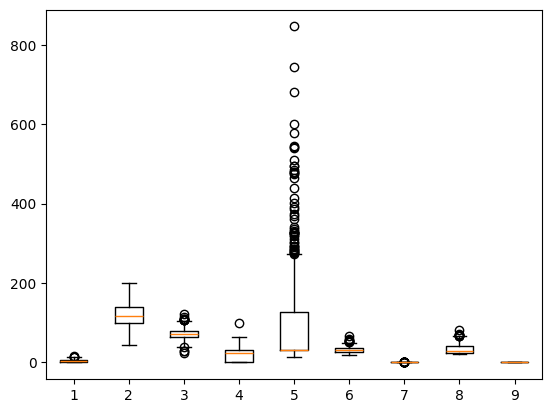

In [715]:
plt.boxplot(df)

In [716]:
def outlier_treatment():
    l = ["BMI","Glucose","SkinThickness","Age","BloodPressure","Insulin","Pregnancies","DiabetesPedigreeFunction"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()

{'whiskers': [<matplotlib.lines.Line2D at 0x1c46607ebb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c46897c760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c46607e100>,
 'medians': [<matplotlib.lines.Line2D at 0x1c46895e460>,
 'fliers': [<matplotlib.lines.Line2D at 0x1c45fdad700>,
 'means': []}

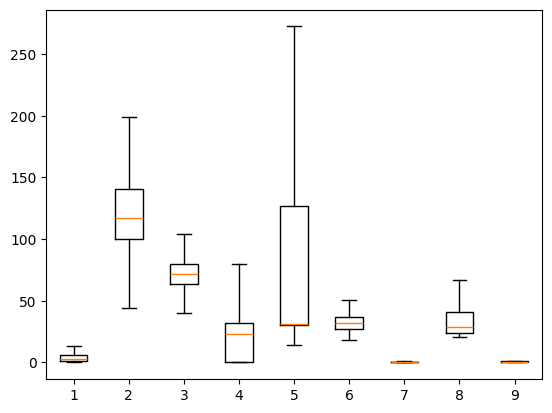

In [717]:
plt.boxplot(df)

# Visualization of Dataset

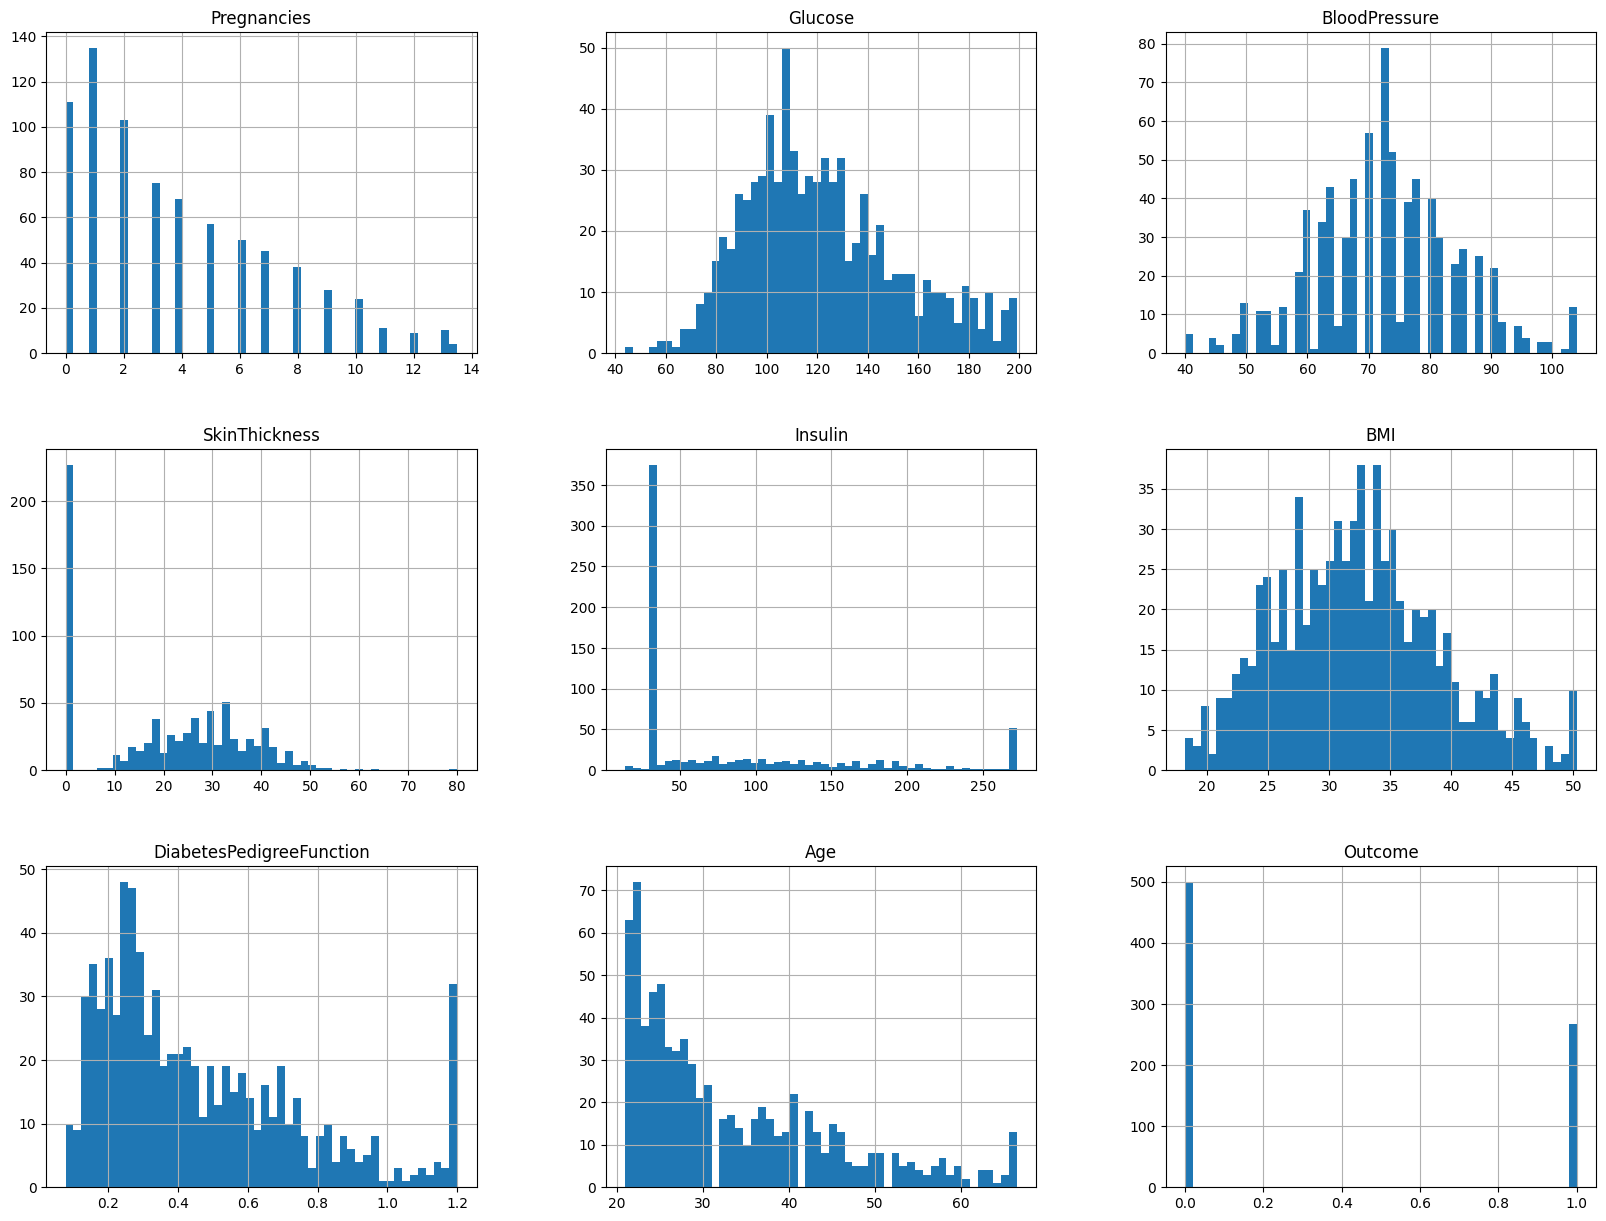

In [718]:
df.hist(bins=50, figsize=(20,15));

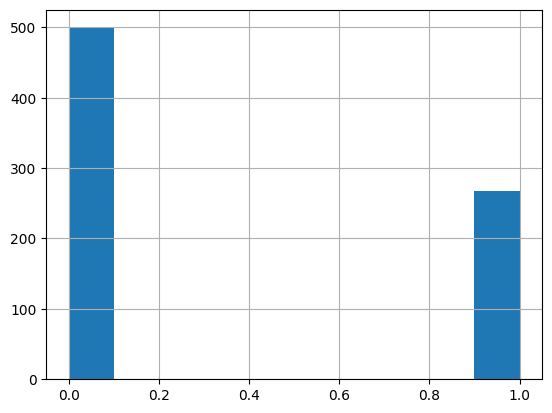

In [719]:
df['Outcome'].hist();

In [720]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126856,0.210906,-0.084349,-0.061192,0.027145,-0.017398,0.549695,0.220392
Glucose,0.126856,1.000000,0.220199,0.071090,0.338429,0.233953,0.118457,0.268912,0.492782
BloodPressure,0.210906,0.220199,1.000000,0.013501,-0.033847,0.286410,0.012305,0.332898,0.168971
SkinThickness,-0.084349,0.071090,0.013501,1.000000,0.464759,0.382740,0.177920,-0.119170,0.073125
Insulin,-0.061192,0.338429,-0.033847,0.464759,1.000000,0.207474,0.191870,-0.040448,0.147295
BMI,0.027145,0.233953,0.286410,0.382740,0.207474,1.000000,0.138541,0.035861,0.313030
DiabetesPedigreeFunction,-0.017398,0.118457,0.012305,0.177920,0.191870,0.138541,1.000000,0.047289,0.184969
Age,0.549695,0.268912,0.332898,-0.119170,-0.040448,0.035861,0.047289,1.000000,0.242702
Outcome,0.220392,0.492782,0.168971,0.073125,0.147295,0.313030,0.184969,0.242702,1.000000


In [721]:
df.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.492782
BMI                         0.313030
Age                         0.242702
Pregnancies                 0.220392
DiabetesPedigreeFunction    0.184969
BloodPressure               0.168971
Insulin                     0.147295
SkinThickness               0.073125
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'correlation of feature')

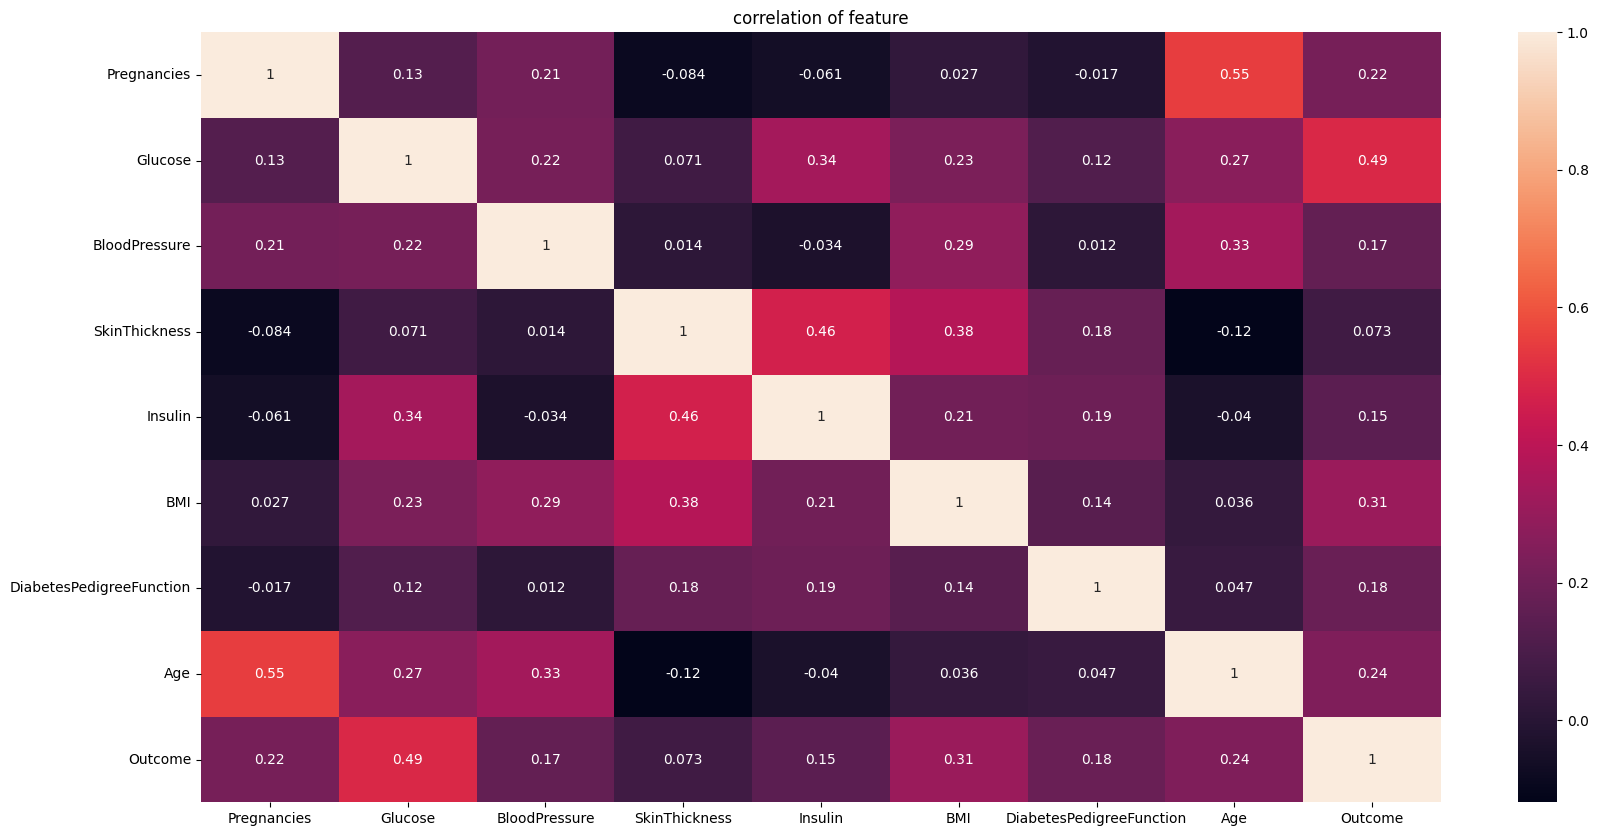

In [722]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("correlation of feature")

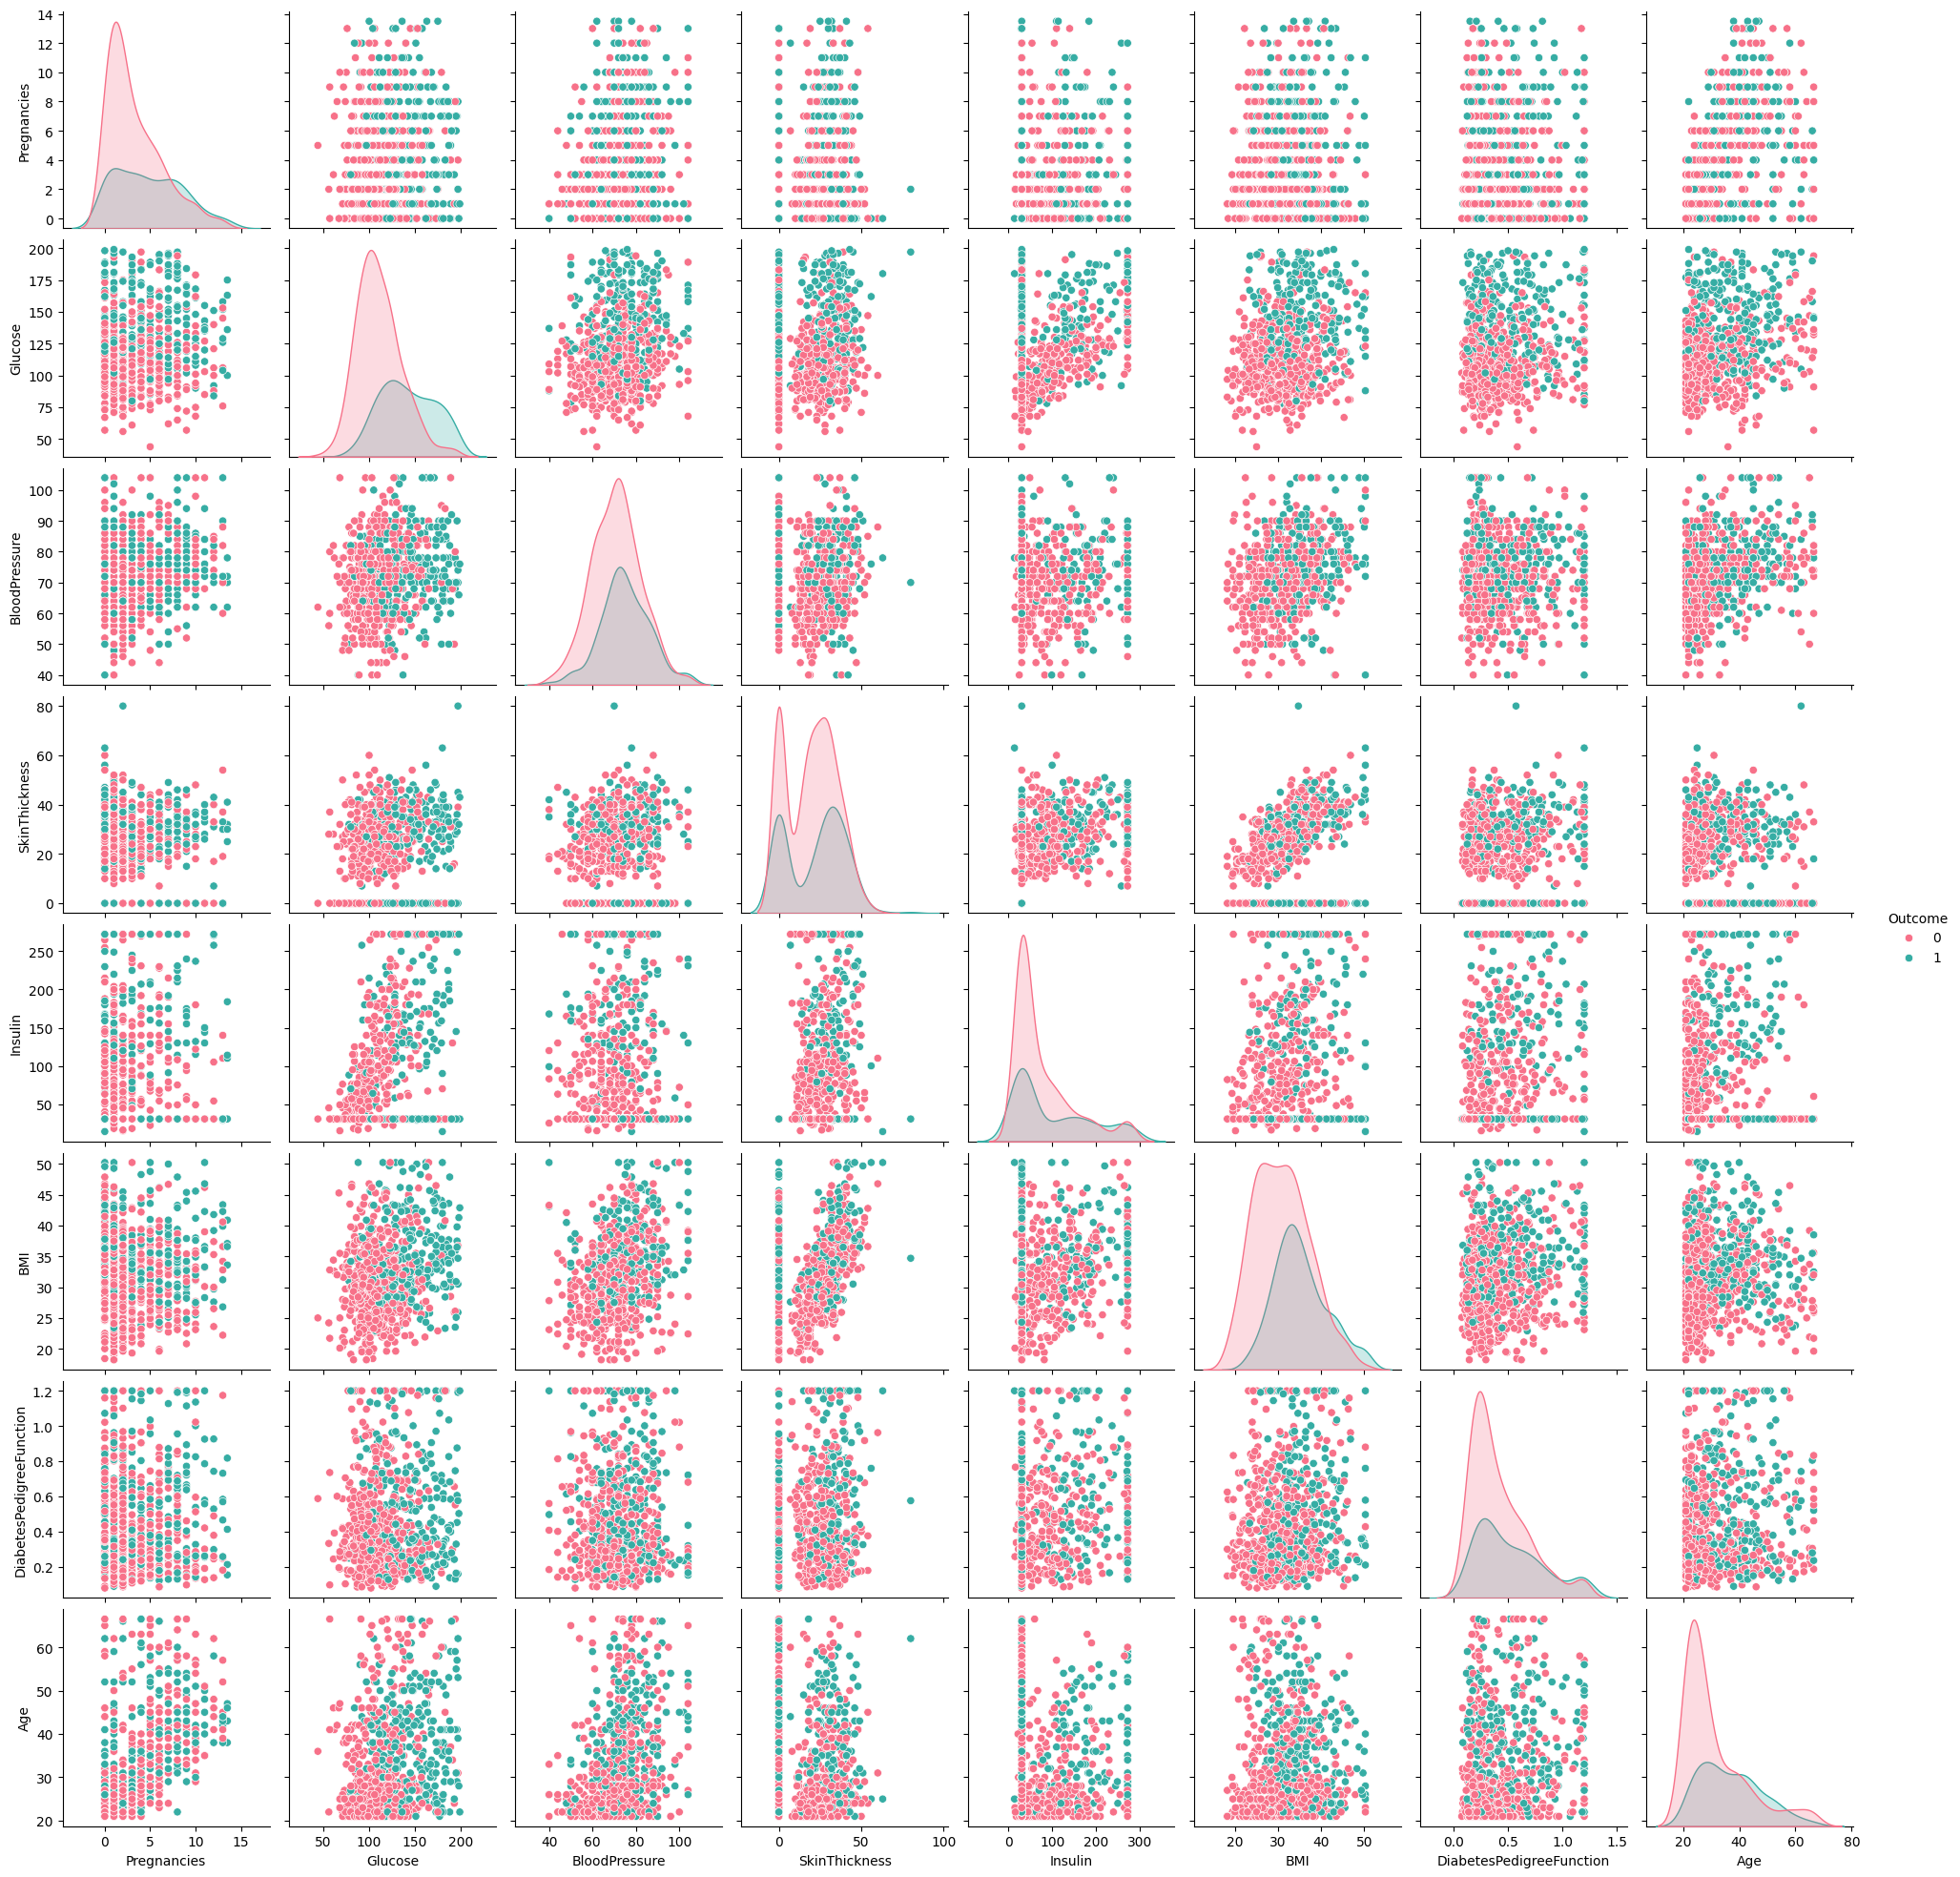

In [723]:
sns.pairplot(df, hue='Outcome', palette="husl")

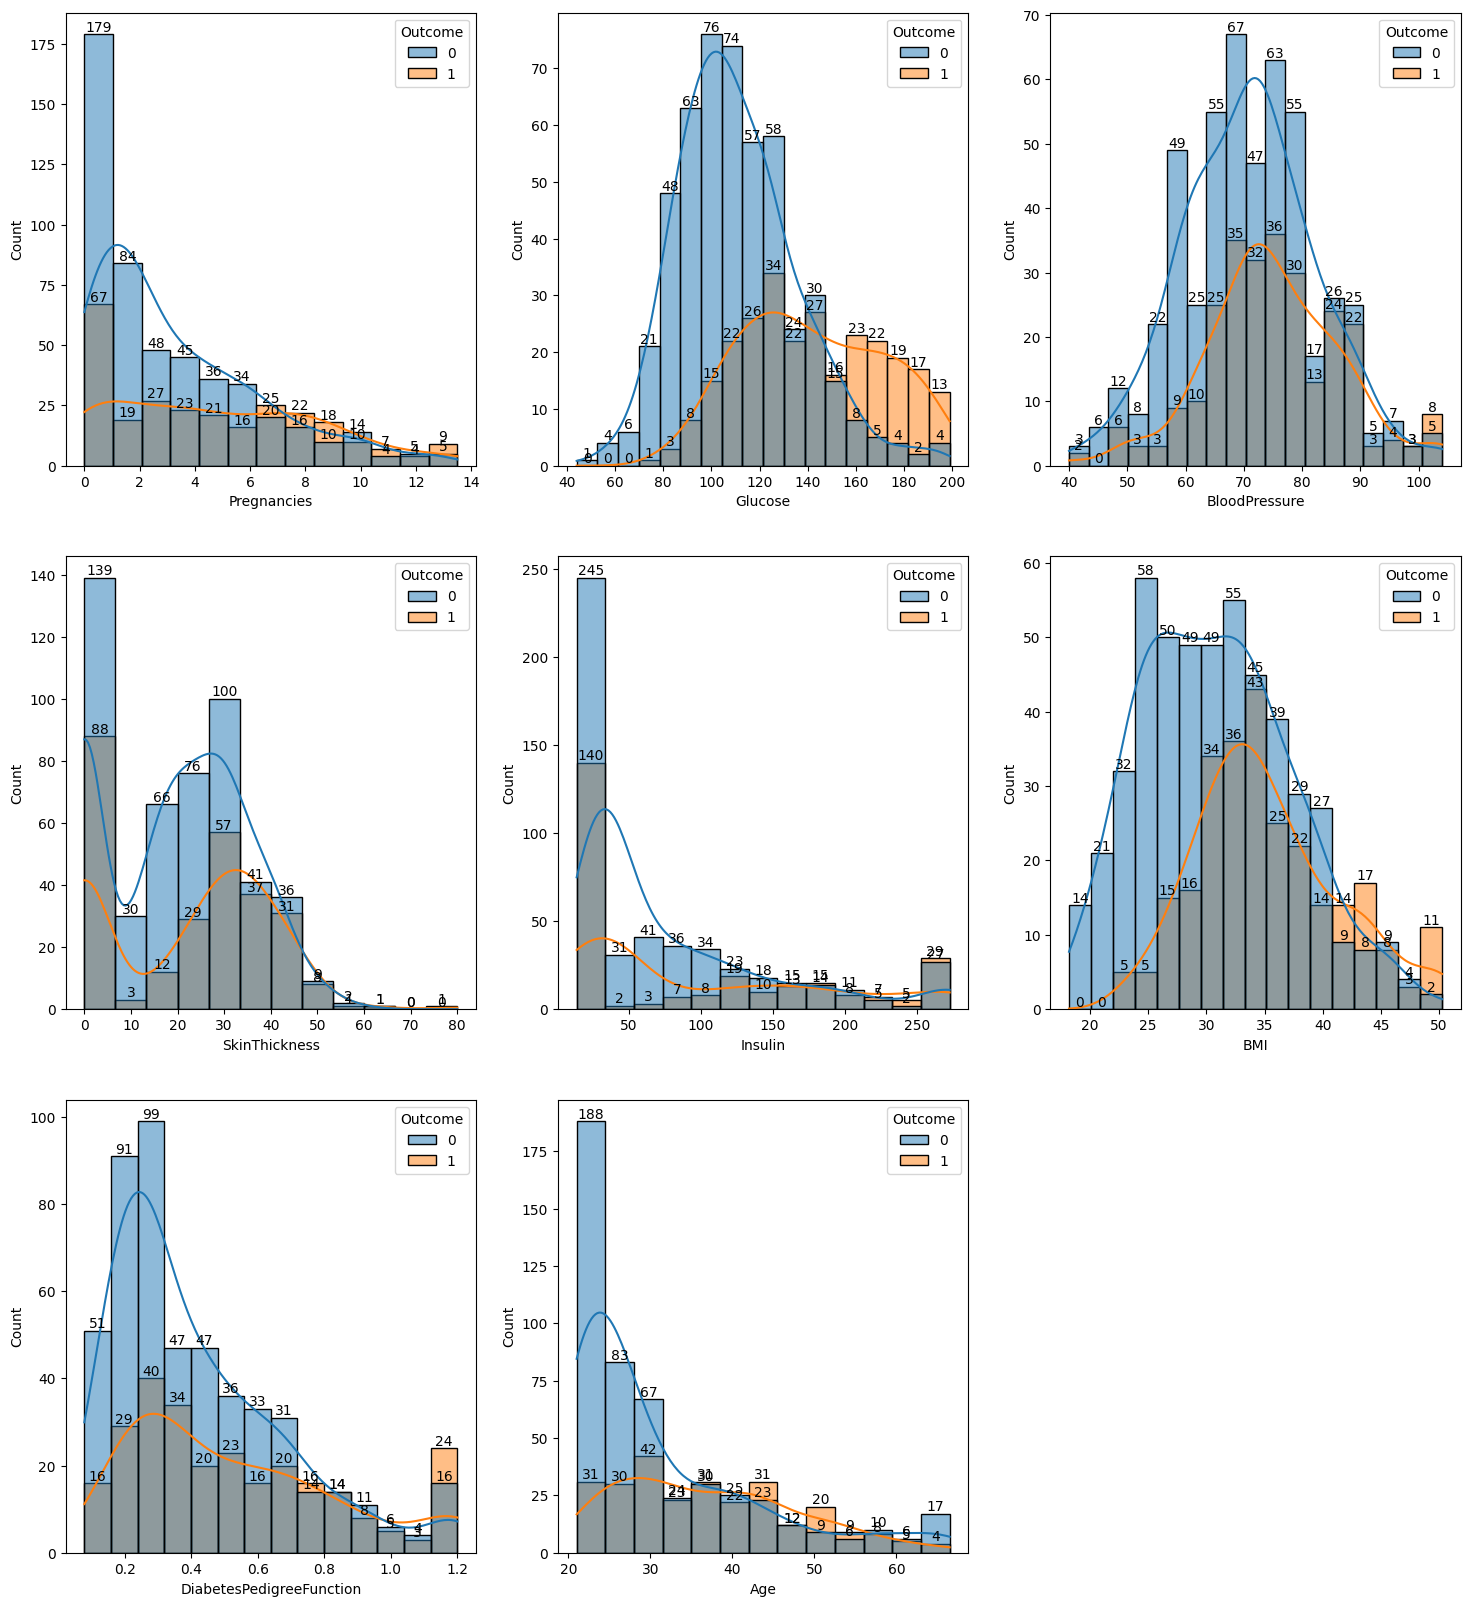

In [724]:
pno = 1
plt.figure(figsize=(18,20))
for i in df.columns:
        if pno<9:
            plt.subplot(3,3,pno)
            ax = sns.histplot(data = df , x = i , hue = df.Outcome , kde = True);
            plt.xlabel(i)
            pno+=1
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)


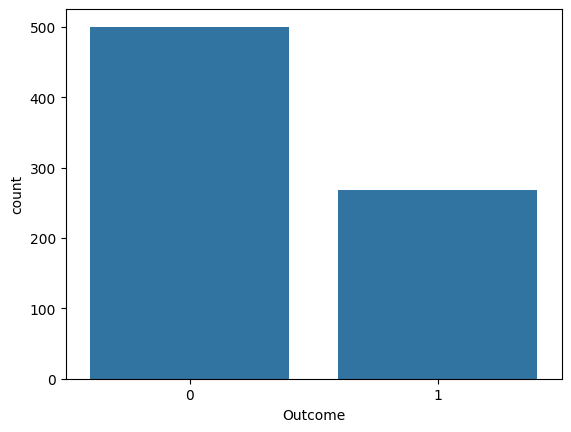

In [725]:
sns.countplot(x ='Outcome', data = df);

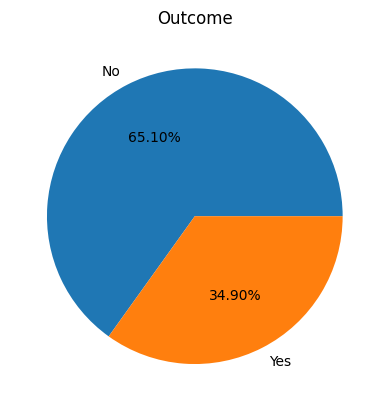

In [726]:
plt.title('Outcome')
plt.pie(df['Outcome'].value_counts(),labels=['No','Yes'], autopct='%1.2f%%')
plt.show()

# Feature Engineering

In [727]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df["NewBMI"] = NewBMI

df.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight
2,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3


In [728]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"
    
# The operation performed was added to the dataframe.
df = df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,Obesity 1,Normal
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,Overweight,Normal
2,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,Normal,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal


In [765]:
# Define a function to categorize glucose levels
def categorize_glucose(glucose):
    if glucose <= 70:
        return "Low"
    elif 70 < glucose <= 99:
        return "Normal"
    elif 99 < glucose <= 126:
        return "Overweight"
    else:
        return "Secret"

# Add a new column "NewGlucose" using assign() and apply()
df = df.assign(NewGlucose=df['Glucose'].apply(categorize_glucose).astype('category'))

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewGlucose
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,True,False,False,False,False,True,False,False,True,Secret
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,False,False,False,True,False,True,True,False,False,Normal
2,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,False,False,False,False,False,True,False,False,True,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,False,False,False,True,False,True,True,False,False,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,False,False,True,False,False,False,False,False,True,Secret


In [730]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
df = pd.get_dummies(df, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,30.5,33.6,0.627,50.0,1,True,False,False,False,False,True,False,False,True
1,1.0,85.0,66.0,29.0,30.5,26.6,0.351,31.0,0,False,False,False,True,False,True,True,False,False
2,8.0,183.0,64.0,0.0,30.5,23.3,0.672,32.0,1,False,False,False,False,False,True,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,False,False,False,True,False,True,True,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,False,False,True,False,False,False,False,False,True


# Machine Learning Prediction

In [731]:
x = df.drop(columns=['Outcome'])
y = df['Outcome']

cols = x.columns
index = x.index

# Scaling the Data

In [732]:
# Import the RobustScaler from scikit-learn for feature scaling
from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object and fit it to the feature set
transformer = RobustScaler().fit(x)

# Transform (scale) the feature set using the fitted scaler
x = transformer.transform(x)

# Convert the scaled feature set back to a DataFrame with original column names and index
x = pd.DataFrame(x, columns=cols, index=index)

x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.765432,0.000,0.37500,-0.007752,0.175824,0.665359,1.235294,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.4,-0.790123,-0.375,0.18750,-0.007752,-0.593407,-0.056209,0.117647,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.629630,-0.500,-0.71875,-0.007752,-0.956044,0.783007,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.4,-0.691358,-0.375,0.00000,0.648579,-0.428571,-0.537255,-0.470588,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.6,0.493827,-2.000,0.37500,1.413437,1.219780,2.163399,0.235294,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,1.0


# Spliting the data

In [733]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.02, random_state=123)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((752, 17), (16, 17), (752,), (16,))

# Logistic Regression

In [734]:
from sklearn.linear_model import LogisticRegression

#fitting data in Logisticregression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)

Ypred = logreg.predict(x_test)

# Model Performance Analysis



In [735]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, roc_curve, roc_auc_score, confusion_matrix

cm = confusion_matrix(y_test,Ypred)
cm

array([[8, 1],
       [1, 6]], dtype=int64)

The cell in the top-left corner represents true negatives (TN).
The cell in the top-right corner represents false positives (FP).
The cell in the bottom-left corner represents false negatives (FN).
The cell in the bottom-right corner represents true positives (TP).

<Axes: >

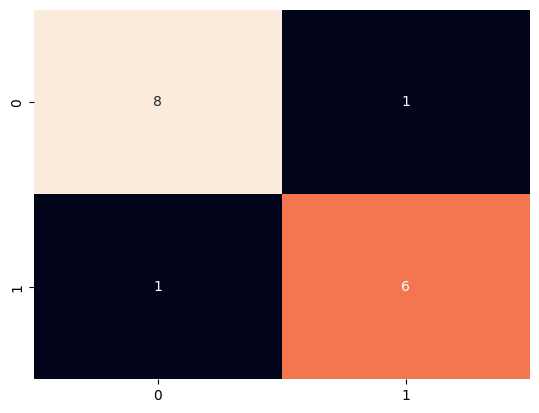

In [736]:
sns.heatmap(cm, cbar = False, fmt = 'g', annot = True)

In [737]:
# Accuracy score
logistic_regression_acc = accuracy_score(y_test,Ypred)
logistic_regression_acc

0.875

**Classification Report**

**Precision Score**

TP – True Positives
FP – False Positives

Precision – Accuracy of positive predictions.
Precision = TP/(TP + FP)

**Recall Score**

FN – False Negatives

Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
Recall = TP/(TP+FN)

**F1 Score**

F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
F1 Score takes into account precision and the recall. 
It is created by finding the the harmonic mean of precision and recall.

F1 = 2 x (precision x recall)/(precision + recall)

Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [738]:
clsl = classification_report(y_test,Ypred)
print(clsl)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.86      0.86      0.86         7

    accuracy                           0.88        16
   macro avg       0.87      0.87      0.87        16
weighted avg       0.88      0.88      0.88        16


In [739]:
f1_score(y_test,Ypred)

0.8571428571428571

In [740]:
fpr,tpr,threshold = roc_curve(y_test , Ypred)
print(fpr)
print(tpr)
print(threshold)

[0.         0.11111111 1.        ]
[0.         0.85714286 1.        ]
[inf  1.  0.]


Roc Curve

ROC (Receiver Operating Characteristic) Curve tells us about how good the model can distinguish between two things (e.g If a patient has a disease or no). Better models can accurately distinguish between the two. Whereas, a poor model will have difficulties in distinguishing between the two

In [741]:
roc_auc_score(y_test,Ypred)

0.873015873015873

# Random Forest

In [742]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predy = rf.predict(x_test)

In [743]:
random_forest_acc = accuracy_score(y_test,predy)
random_forest_acc

0.8125

# K Nearest Neighbors

In [744]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [745]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [746]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 93.75 % and k = [9, 10, 11, 12, 13, 14]


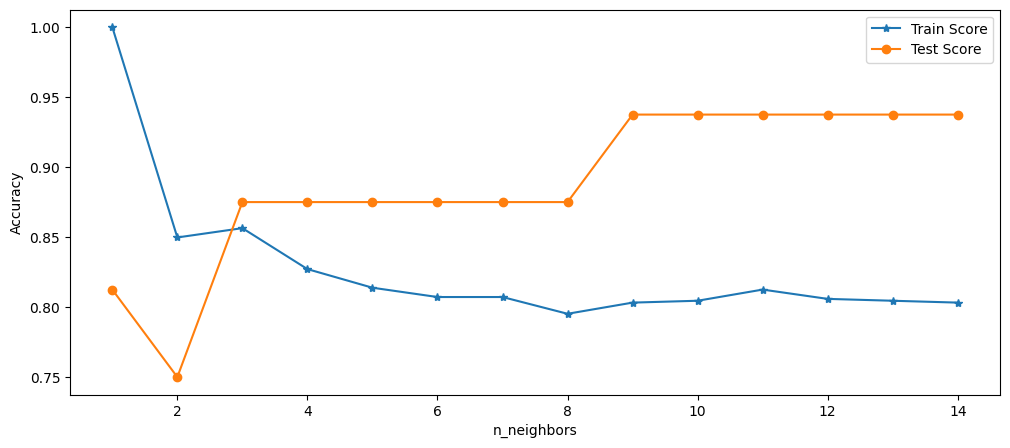

In [747]:
plt.figure(figsize=(12,5))
plt.plot(range(1,15),train_scores,marker='*',label='Train Score')
plt.plot(range(1,15),test_scores ,marker='o',label='Test Score')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [748]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)

y_predict = knn.predict(x_test)

KNN_acc = accuracy_score(y_test,y_predict)
KNN_acc

0.9375

# Support Vector Classifier

In [749]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

In [750]:
support_vector_acc = accuracy_score(y_test, y_pred)
support_vector_acc

0.9375

# Decision Tree Classifier

In [751]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

In [752]:
decision_tree_acc = accuracy_score(y_test, y_pred)
decision_tree_acc

0.8125

# Feature Importance in Decision Trees

In [753]:
dtc.feature_importances_

array([0.05249622, 0.2494513 , 0.10464864, 0.04307447, 0.03680428,
       0.23250396, 0.10951805, 0.1248468 , 0.00515087, 0.0076285 ,
       0.        , 0.        , 0.        , 0.00293404, 0.        ,
       0.03094287, 0.        ])

In [754]:
diabetes_features = x.columns

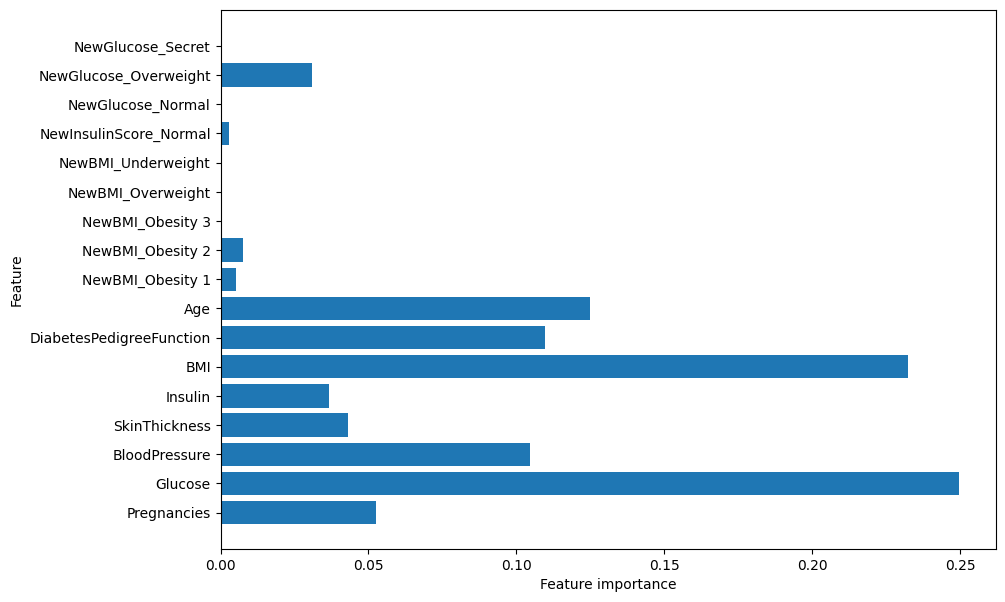

In [755]:
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(10,7))
    n_features = 17
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    # plt.ylim(-1, n_features)
    
plot_feature_importances_diabetes(dtc)

# Plotting Accuracy Scores of all ML Algorithms

In [756]:
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVC', 'Decision Tree']
scores = [logistic_regression_acc, random_forest_acc, KNN_acc, support_vector_acc, decision_tree_acc]

models = pd.DataFrame({'Model' : models, 'Score' : scores})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,KNN,0.9375
3,SVC,0.9375
0,Logistic Regression,0.8750
1,Random Forest,0.8125
4,Decision Tree,0.8125


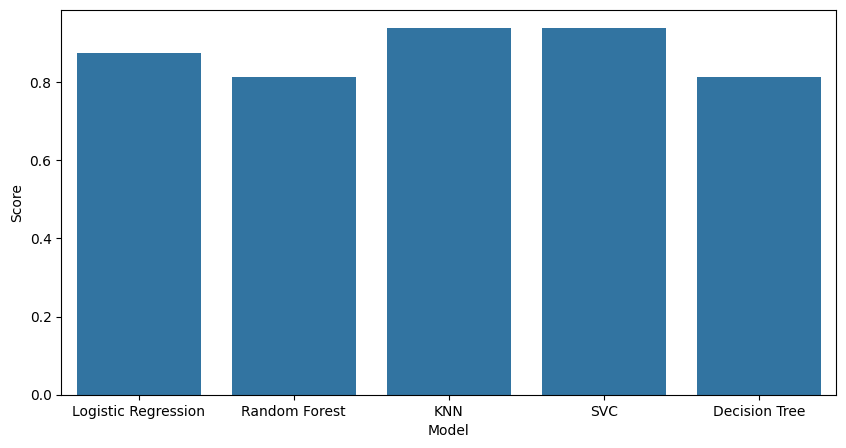

In [757]:
plt.figure(figsize = (10, 5))
sns.barplot(x = 'Model', y = 'Score', data = models)
plt.show()

# Summary

**Achievement - K nearest neighbor (KNN) achieved the highest accuracy of 93.75.**

In order to predict whether a person is likely to be a diabetic person or not, machine learning algorithms were applied to the PIMA Indian Diabetes Dataset.

The exploratory data analysis let us know the overview of our dataset, how many attributes it has, data types of attributes, and some statistics about attributes. Outcome variable also examined here.

Data preprocessing or data cleaning helps in refining the dataset. It makes our dataset well-formed and prepares data for analysis. Zero, duplicate, and null values are checked and replaced with respactive attribute median value.

Outliers are data points that are significantly different from the rest of the dataset. Outlier Observation Analysis tries to find these outliers and remove them.

Visualization of dataset helps in better understanding our dataset. Attribute value ranges are easily observed here. A heatmap of correlation indicates how strongly our attributes are related to the outcome variable. Pairplot and Histplot are also examined and incorporated in this project.

Feature engineering may improve the accuracy of machine learning models. New attributes (features) are created here. Label encoding and one hot encoding are required for converting our new attribute values into numerical values.

In order to perform machine learning algorithms, scaling and splitting the data is required. The Scikit-Learn library is used here for supervised machine learning. Logistic regression, random forest, K nearest neighbor, support vector classifier, and decision tree classifier methods are applied.

Model Performance Analysis involved a confusion matrix, ROC curve, accuracy score, etc., and plotting the accuracy scores of all ML algorithms. Thus, it is found that K nearest neighbours (KNN) has the highest accuracy of 93.75.